### DATA CLEANING

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# Loading the dataset:
df = pd.read_csv("../../data/processed/heart_2022.csv")

In [15]:
# Making a copy from the original dataframe, so the original dataset doesn't get changed for good practice:
df_cleaned = df.copy()

In [16]:
# We decided to drop all the NaN values, since they are only a fraction of the dataset:
df_cleaned.info()
df_cleaned = df.dropna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Sex                    445132 non-null  object 
 1   GeneralHealth          443934 non-null  object 
 2   PhysicalHealthDays     434205 non-null  float64
 3   MentalHealthDays       436065 non-null  float64
 4   PhysicalActivities     444039 non-null  object 
 5   SleepHours             439679 non-null  float64
 6   HadHeartAttack         442067 non-null  object 
 7   HadAngina              440727 non-null  object 
 8   HadStroke              443575 non-null  object 
 9   HadAsthma              443359 non-null  object 
 10  HadDepressiveDisorder  442320 non-null  object 
 11  HadKidneyDisease       443206 non-null  object 
 12  HadDiabetes            444045 non-null  object 
 13  DifficultyWalking      421120 non-null  object 
 14  SmokerStatus           409670 non-nu

In [17]:
""" 
Assuming the presence of Heart Disease is indicated 
by any "Yes" in these three Heart conditions.

We create a new column called "HadHeartDisease" derived from the three Heart conditions,
which we decided from the exploration phase.
"""
df_cleaned["HadHeartDisease"] = (
    (df_cleaned["HadHeartAttack"] == "Yes")
    | (df_cleaned["HadAngina"] == "Yes")
    | (df_cleaned["HadStroke"] == "Yes")
).astype(int)


C:\Users\markl\AppData\Local\Temp\ipykernel_50012\212280325.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["HadHeartDisease"] = (


In [18]:
""" 
We decided to drop "HeightInMeters" and "WeightInKilograms" since "BMI" will give
a better overall representation of those two columns.

We also drop the three previous Heart conditions from the data,
since we now have "HadHeartDisease" instead.
"""
df_cleaned.drop(
    columns=[
        "HeightInMeters",
        "WeightInKilograms",
        "HadHeartAttack",
        "HadAngina",
        "HadStroke",
    ],
    inplace=True,
)

C:\Users\markl\AppData\Local\Temp\ipykernel_50012\4100610128.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop(


#### Identifying and Removing Outliers

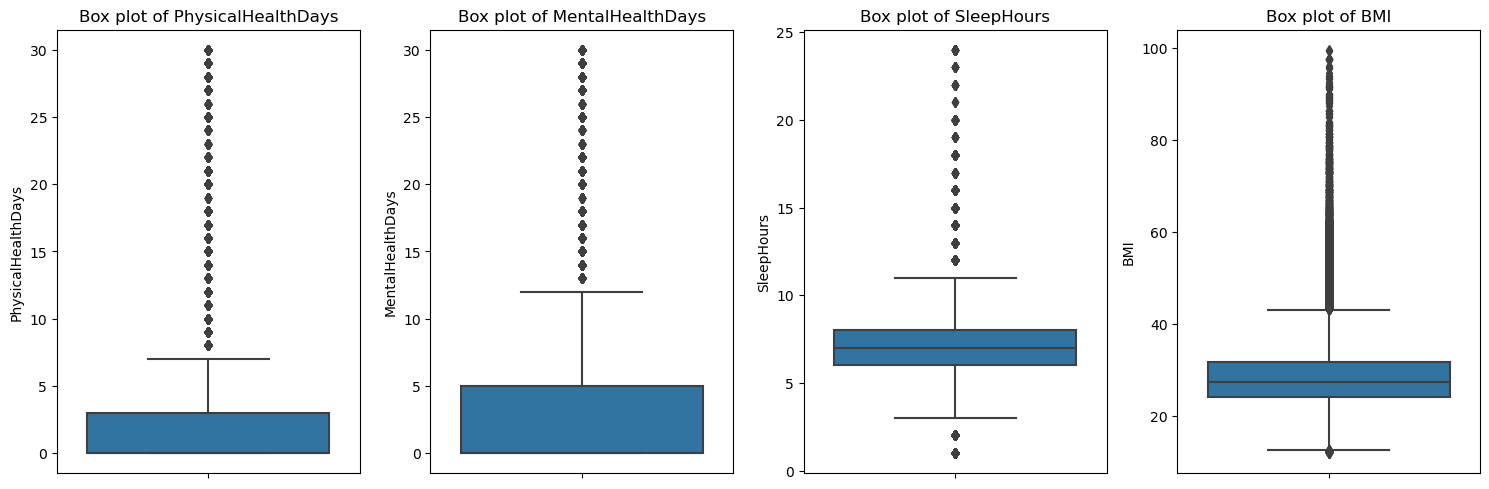

In [19]:

""" 
These 4 columns will help us identify outliers,
since their datatypes are numeric, thus we found it suitable.

"""
columns_to_plot = ["PhysicalHealthDays", "MentalHealthDays", "SleepHours", "BMI"]

# These box plots will display the outliers outside the whiskers:
plt.figure(figsize=(15, 5))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(1, len(columns_to_plot), i)
    sns.boxplot(y=df[column])
    plt.title(f"Box plot of {column}")

plt.tight_layout()
plt.show()

In [20]:
# We have decided to identify and remove Outliers using the IQR Range:
def remove_outliers_iqr(dataset, col):
    """
    Args:
        dataset (pd.DataFrame): The dataset.
        col (string): The column you want apply outlier detection to.
    """

    Q1 = dataset[col].quantile(0.15)
    Q3 = dataset[col].quantile(0.85)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filtering the DataFrame to remove outliers:
    df_filtered = dataset[(dataset[col] >= lower_bound) & (dataset[col] <= upper_bound)]

    return df_filtered

In [21]:
# Removing outliers for each of chosen columns:
columns_to_remove_outliers = [
    "BMI",
    "SleepHours",
    "PhysicalHealthDays",
    "MentalHealthDays",
]
for column in columns_to_remove_outliers:
    df_no_outliers = remove_outliers_iqr(df_cleaned, column)

df_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 294721 entries, 1 to 445131
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Sex                    294721 non-null  object 
 1   GeneralHealth          294721 non-null  object 
 2   PhysicalHealthDays     294721 non-null  float64
 3   MentalHealthDays       294721 non-null  float64
 4   PhysicalActivities     294721 non-null  object 
 5   SleepHours             294721 non-null  float64
 6   HadAsthma              294721 non-null  object 
 7   HadDepressiveDisorder  294721 non-null  object 
 8   HadKidneyDisease       294721 non-null  object 
 9   HadDiabetes            294721 non-null  object 
 10  DifficultyWalking      294721 non-null  object 
 11  SmokerStatus           294721 non-null  object 
 12  ECigaretteUsage        294721 non-null  object 
 13  RaceEthnicityCategory  294721 non-null  object 
 14  AgeCategory            294721 non-null  o

> We have decided to keep the outliers, since they may be significant in the
prediction models. 
- The IQR method above is the technique we would've applied if we decided to remove outliers, and by applying it first, we came to the conclusion that the outliers might be essential in our prediction model, thus we decided to keep them.

- The conclusion was based on a test with and without outliers, and the models gave the best results with outliers, which also showcases the real world, where the majority does not have any Heart Diseases.

In [22]:
# Saving the cleaned file with outliers to be used for the phase, data transformation:
df_cleaned.to_csv("../../data/processed/heart_2022_cleaned.csv", index=False)

In [23]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 314171 entries, 1 to 445131
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Sex                    314171 non-null  object 
 1   GeneralHealth          314171 non-null  object 
 2   PhysicalHealthDays     314171 non-null  float64
 3   MentalHealthDays       314171 non-null  float64
 4   PhysicalActivities     314171 non-null  object 
 5   SleepHours             314171 non-null  float64
 6   HadAsthma              314171 non-null  object 
 7   HadDepressiveDisorder  314171 non-null  object 
 8   HadKidneyDisease       314171 non-null  object 
 9   HadDiabetes            314171 non-null  object 
 10  DifficultyWalking      314171 non-null  object 
 11  SmokerStatus           314171 non-null  object 
 12  ECigaretteUsage        314171 non-null  object 
 13  RaceEthnicityCategory  314171 non-null  object 
 14  AgeCategory            314171 non-null  o